In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm

In [2]:
path = 'https:\\github.com\tracesauter\news-financial-sentiment\tree\Time Series Lasso\"
file = path + 'data_with_doc2vec.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
print(df.head)

<bound method NDFrame.head of                                                    Title        Date       CP  \
0       JPMorgan Predicts 2008 Will Be "Nothing But Net"  2008-01-02  1447.16   
1      Dow Tallies Biggest First-session-of-year Poin...  2008-01-02  1447.16   
2                       2008 predictions for the S&P 500  2008-01-02  1447.16   
3      U.S. Stocks Higher After Economic Data, Monsan...  2008-01-03  1447.16   
4      U.S. Stocks Climb As Hopes Increase For More F...  2008-01-07  1416.18   
...                                                  ...         ...      ...   
19122          REITs vs. Stocks: What Does the Data Say?  2024-03-04  5130.95   
19123  Nasdaq Index, Dow Jones, S&P 500 News: Futures...  2024-03-04  5130.95   
19124  Nasdaq 100, Dow Jones, S&P 500 News: Cautious ...  2024-03-04  5130.95   
19125  Bank of America boosts S&P 500 target to 5,400...  2024-03-04  5130.95   
19126  S&P 500 Gains and Losses Today: Tesla Shares T...  2024-03-04  5130.95  

In [5]:
df2 = pd.read_csv(path + "add_lexicon_sentiment_to_headlines.csv")
df2 = df2.drop(columns=["ma5", "return", "target", "CP", "Date", "next_close"]).drop_duplicates()
print(df2.shape)

(18049, 3)


In [6]:
merged_df = pd.merge(df, df2, on='Title')

In [7]:
print(df.shape)
print(merged_df.shape)

(19127, 104)
(19122, 106)


In [8]:
print(merged_df.head)

<bound method NDFrame.head of                                                    Title        Date       CP  \
0      U.S. Stocks Climb As Hopes Increase For More F...  2008-01-07  1416.18   
1      How Investing in Intangibles -- Like Employee ...  2008-01-09  1409.13   
2             Head And Shoulders Top Bodes Ill For Bulls  2008-01-09  1409.13   
3      U.S. Stocks Zigzag Higher As Bernanke Speech S...  2008-01-10  1420.33   
4      It's a Black Monday as stock markets tank in e...  2008-01-22  1310.50   
...                                                  ...         ...      ...   
19117  Workday falls after missing the cut for S&P 50...  2024-03-04  5130.95   
19118          REITs vs. Stocks: What Does the Data Say?  2024-03-04  5130.95   
19119  Nasdaq Index, Dow Jones, S&P 500 News: Futures...  2024-03-04  5130.95   
19120  Nasdaq 100, Dow Jones, S&P 500 News: Cautious ...  2024-03-04  5130.95   
19121  Bank of America boosts S&P 500 target to 5,400...  2024-03-04  5130.95  

In [9]:
print(merged_df.columns)

Index(['Title', 'Date', 'CP', 'Title_Vector', 'doc2vec_1', 'doc2vec_2',
       'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6',
       ...
       'doc2vec_93', 'doc2vec_94', 'doc2vec_95', 'doc2vec_96', 'doc2vec_97',
       'doc2vec_98', 'doc2vec_99', 'doc2vec_100', 'sent_sum', 'sent_avg'],
      dtype='object', length=106)


In [10]:
merged_df['Date_Updated'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date_Updated', inplace=True)
merged_df.sort_index(inplace=True)

In [11]:
print(merged_df.head)

<bound method NDFrame.head of                                                           Title        Date  \
Date_Updated                                                                  
2008-01-07    U.S. Stocks Climb As Hopes Increase For More F...  2008-01-07   
2008-01-09    How Investing in Intangibles -- Like Employee ...  2008-01-09   
2008-01-09           Head And Shoulders Top Bodes Ill For Bulls  2008-01-09   
2008-01-10    U.S. Stocks Zigzag Higher As Bernanke Speech S...  2008-01-10   
2008-01-22    It's a Black Monday as stock markets tank in e...  2008-01-22   
...                                                         ...         ...   
2024-03-04    Workday falls after missing the cut for S&P 50...  2024-03-04   
2024-03-04            REITs vs. Stocks: What Does the Data Say?  2024-03-04   
2024-03-04    Nasdaq Index, Dow Jones, S&P 500 News: Futures...  2024-03-04   
2024-03-04    Nasdaq 100, Dow Jones, S&P 500 News: Cautious ...  2024-03-04   
2024-03-04    Bank of 

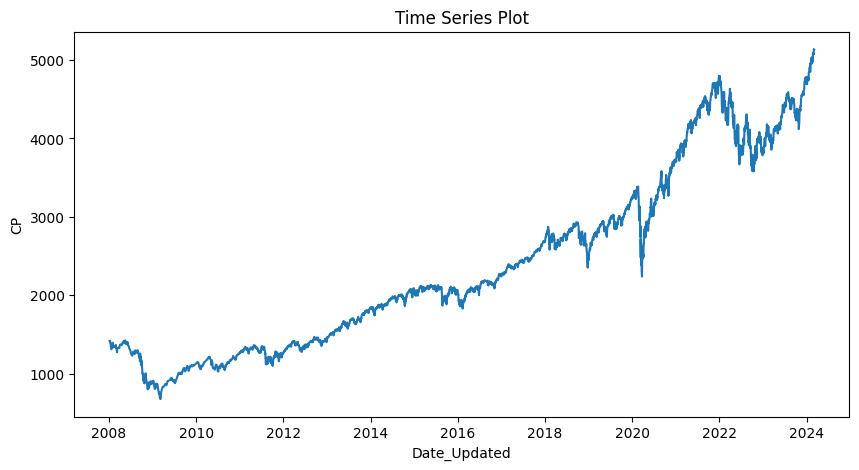

In [12]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(merged_df['CP'])
plt.title('Time Series Plot')
plt.xlabel('Date_Updated')
plt.ylabel('CP')
plt.show()

In [13]:
column_names_list = merged_df.columns.tolist()
print(column_names_list)

['Title', 'Date', 'CP', 'Title_Vector', 'doc2vec_1', 'doc2vec_2', 'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6', 'doc2vec_7', 'doc2vec_8', 'doc2vec_9', 'doc2vec_10', 'doc2vec_11', 'doc2vec_12', 'doc2vec_13', 'doc2vec_14', 'doc2vec_15', 'doc2vec_16', 'doc2vec_17', 'doc2vec_18', 'doc2vec_19', 'doc2vec_20', 'doc2vec_21', 'doc2vec_22', 'doc2vec_23', 'doc2vec_24', 'doc2vec_25', 'doc2vec_26', 'doc2vec_27', 'doc2vec_28', 'doc2vec_29', 'doc2vec_30', 'doc2vec_31', 'doc2vec_32', 'doc2vec_33', 'doc2vec_34', 'doc2vec_35', 'doc2vec_36', 'doc2vec_37', 'doc2vec_38', 'doc2vec_39', 'doc2vec_40', 'doc2vec_41', 'doc2vec_42', 'doc2vec_43', 'doc2vec_44', 'doc2vec_45', 'doc2vec_46', 'doc2vec_47', 'doc2vec_48', 'doc2vec_49', 'doc2vec_50', 'doc2vec_51', 'doc2vec_52', 'doc2vec_53', 'doc2vec_54', 'doc2vec_55', 'doc2vec_56', 'doc2vec_57', 'doc2vec_58', 'doc2vec_59', 'doc2vec_60', 'doc2vec_61', 'doc2vec_62', 'doc2vec_63', 'doc2vec_64', 'doc2vec_65', 'doc2vec_66', 'doc2vec_67', 'doc2vec_68', 'doc2vec_69', 'do

In [14]:
interaction_df = pd.DataFrame()

for i in range(1, 101):
    interaction_df[f'sent_sum_doc2vec_{i}'] = merged_df['sent_sum'] * merged_df[f'doc2vec_{i}']
    interaction_df[f'sent_avg_doc2vec_{i}'] = merged_df['sent_avg'] * merged_df[f'doc2vec_{i}']

# Concatenate interaction features all at once
merged_df = pd.concat([merged_df, interaction_df], axis=1)

# Make a copy to defragment and improve performance
merged_df = merged_df.copy()

C:\Users\georg\AppData\Local\Temp\ipykernel_1392\2837349153.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_df[f'sent_sum_doc2vec_{i}'] = merged_df['sent_sum'] * merged_df[f'doc2vec_{i}']
C:\Users\georg\AppData\Local\Temp\ipykernel_1392\2837349153.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_df[f'sent_avg_doc2vec_{i}'] = merged_df['sent_avg'] * merged_df[f'doc2vec_{i}']
C:\Users\georg\AppData\Local\Temp\ipykernel_1392\2837349153.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

In [15]:
# Drop "Title_Vector"
merged_df = merged_df.drop(columns=['Title_Vector'])

# Group by Date index, concatenate Title strings separated by "; ", sum all other columns
df_combined = merged_df.groupby(merged_df.index).agg(
    {
        'Title': lambda x: '; '.join(x),
        'CP': 'mean',
        **{col: 'sum' for col in merged_df.columns if col not in ['Title', 'CP', 'Date']}
    }
)

# df_combined now has combined features by date, with Title concatenated and no Title_Vector
print(df_combined.head())

                                                          Title  \
Date_Updated                                                      
2008-01-07    U.S. Stocks Climb As Hopes Increase For More F...   
2008-01-09    How Investing in Intangibles -- Like Employee ...   
2008-01-10    U.S. Stocks Zigzag Higher As Bernanke Speech S...   
2008-01-22    It's a Black Monday as stock markets tank in e...   
2008-01-29    Former Connecticut hedge fund exec sues in son...   

                                                  Date       CP  doc2vec_1  \
Date_Updated                                                                 
2008-01-07                                  2008-01-07  1416.18  -0.010123   
2008-01-09                        2008-01-092008-01-09  2818.26  -0.014567   
2008-01-10                                  2008-01-10  1420.33  -0.029914   
2008-01-22    2008-01-222008-01-222008-01-222008-01-22  5242.00  -0.011182   
2008-01-29                                  2008-01-29  1362.3

In [16]:
print(df_combined.shape)
column_names_list = df_combined.columns.tolist()
print(column_names_list)

(3505, 305)
['Title', 'Date', 'CP', 'doc2vec_1', 'doc2vec_2', 'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6', 'doc2vec_7', 'doc2vec_8', 'doc2vec_9', 'doc2vec_10', 'doc2vec_11', 'doc2vec_12', 'doc2vec_13', 'doc2vec_14', 'doc2vec_15', 'doc2vec_16', 'doc2vec_17', 'doc2vec_18', 'doc2vec_19', 'doc2vec_20', 'doc2vec_21', 'doc2vec_22', 'doc2vec_23', 'doc2vec_24', 'doc2vec_25', 'doc2vec_26', 'doc2vec_27', 'doc2vec_28', 'doc2vec_29', 'doc2vec_30', 'doc2vec_31', 'doc2vec_32', 'doc2vec_33', 'doc2vec_34', 'doc2vec_35', 'doc2vec_36', 'doc2vec_37', 'doc2vec_38', 'doc2vec_39', 'doc2vec_40', 'doc2vec_41', 'doc2vec_42', 'doc2vec_43', 'doc2vec_44', 'doc2vec_45', 'doc2vec_46', 'doc2vec_47', 'doc2vec_48', 'doc2vec_49', 'doc2vec_50', 'doc2vec_51', 'doc2vec_52', 'doc2vec_53', 'doc2vec_54', 'doc2vec_55', 'doc2vec_56', 'doc2vec_57', 'doc2vec_58', 'doc2vec_59', 'doc2vec_60', 'doc2vec_61', 'doc2vec_62', 'doc2vec_63', 'doc2vec_64', 'doc2vec_65', 'doc2vec_66', 'doc2vec_67', 'doc2vec_68', 'doc2vec_69', 'doc2ve

In [17]:
for i in range(1321,1351):
    print(df_combined["sent_sum_doc2vec_25"][i], "  =  ", df_combined["sent_sum"][i], "   x   ", df_combined["doc2vec_25"][i])

-0.075538299   =   -1.2    x    0.16124908300000002
0.0   =   0.0    x    -0.057560109
-0.0098784498   =   -0.6    x    0.043121949
0.0   =   0.0    x    0.0065940575999999945
-0.0376234506   =   -1.7999999999999998    x    0.12475188400000001
0.0283410942   =   -0.6    x    -0.047235157
-0.0783411048   =   -2.4    x    0.12204165300000001
0.0   =   0.0    x    -0.05714593885
0.0   =   0.0    x    -0.054441538
0.0   =   0.0    x    0.0845032
0.0208322232   =   -1.2    x    -0.017451609999999992
0.0   =   0.0    x    0.052439074
0.0195950724   =   -0.6    x    -0.039816686
-0.06902534444   =   -1.2999999999999998    x    0.11406103420000001
0.03938922   =   -0.4    x    0.291146221
0.0   =   0.0    x    0.036899388
0.016604057399999997   =   -1.2    x    -0.047583837000000004
-0.040116682380000004   =   -1.7999999999999998    x    0.4372712973
0.016274037   =   -1.0    x    -0.028364264
-0.029939651999999997   =   -0.6    x    -0.026719533000000004
0.010403958000000005   =   -1.2    x  

C:\Users\georg\AppData\Local\Temp\ipykernel_1392\3935394514.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_combined["sent_sum_doc2vec_25"][i], "  =  ", df_combined["sent_sum"][i], "   x   ", df_combined["doc2vec_25"][i])


In [18]:
df_combined = df_combined.sort_index()
lags = range(1, 11)
doc2vec_range = range(1, 100)

# Columns to lag
cols_to_lag = ['CP', 'sent_sum', 'sent_avg'] + \
              [f'doc2vec_{i}' for i in doc2vec_range] + \
              [f'sent_sum_doc2vec_{i}' for i in doc2vec_range] + \
              [f'sent_avg_doc2vec_{i}' for i in doc2vec_range]

# Create lagged features
for lag in lags:
    shifted = df_combined[cols_to_lag].shift(lag)
    shifted.columns = [f'{col}_lag_{lag}' for col in shifted.columns]
    df_combined = pd.concat([df_combined, shifted], axis=1)

In [19]:
column_names_list = df_combined.columns.tolist()
print(df_combined.shape)
print(column_names_list)


(3505, 3305)
['Title', 'Date', 'CP', 'doc2vec_1', 'doc2vec_2', 'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6', 'doc2vec_7', 'doc2vec_8', 'doc2vec_9', 'doc2vec_10', 'doc2vec_11', 'doc2vec_12', 'doc2vec_13', 'doc2vec_14', 'doc2vec_15', 'doc2vec_16', 'doc2vec_17', 'doc2vec_18', 'doc2vec_19', 'doc2vec_20', 'doc2vec_21', 'doc2vec_22', 'doc2vec_23', 'doc2vec_24', 'doc2vec_25', 'doc2vec_26', 'doc2vec_27', 'doc2vec_28', 'doc2vec_29', 'doc2vec_30', 'doc2vec_31', 'doc2vec_32', 'doc2vec_33', 'doc2vec_34', 'doc2vec_35', 'doc2vec_36', 'doc2vec_37', 'doc2vec_38', 'doc2vec_39', 'doc2vec_40', 'doc2vec_41', 'doc2vec_42', 'doc2vec_43', 'doc2vec_44', 'doc2vec_45', 'doc2vec_46', 'doc2vec_47', 'doc2vec_48', 'doc2vec_49', 'doc2vec_50', 'doc2vec_51', 'doc2vec_52', 'doc2vec_53', 'doc2vec_54', 'doc2vec_55', 'doc2vec_56', 'doc2vec_57', 'doc2vec_58', 'doc2vec_59', 'doc2vec_60', 'doc2vec_61', 'doc2vec_62', 'doc2vec_63', 'doc2vec_64', 'doc2vec_65', 'doc2vec_66', 'doc2vec_67', 'doc2vec_68', 'doc2vec_69', 'doc2v

In [20]:
# List of base columns to create moving averages for
base_cols = ['sent_sum', 'sent_avg']

# Add doc2vec columns
doc2vec_cols = [f'doc2vec_{i}' for i in range(1, 101)]

# Interaction columns
sent_sum_inter_cols = [f'sent_sum_doc2vec_{i}' for i in range(1, 101)]
sent_avg_inter_cols = [f'sent_avg_doc2vec_{i}' for i in range(1, 101)]

# Combine all
all_cols = base_cols + doc2vec_cols + sent_sum_inter_cols + sent_avg_inter_cols

# Calculate moving averages for each column
for col in all_cols:
    df_combined[f'{col}_ma5'] = df_combined[col].rolling(window=5, min_periods=1).mean()
    df_combined[f'{col}_ma10'] = df_combined[col].rolling(window=10, min_periods=1).mean()
    df_combined[f'{col}_ma30'] = df_combined[col].rolling(window=30, min_periods=1).mean()

C:\Users\georg\AppData\Local\Temp\ipykernel_1392\3299816494.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_combined[f'{col}_ma10'] = df_combined[col].rolling(window=10, min_periods=1).mean()
C:\Users\georg\AppData\Local\Temp\ipykernel_1392\3299816494.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_combined[f'{col}_ma30'] = df_combined[col].rolling(window=10, min_periods=1).mean()
C:\Users\georg\AppData\Local\Temp\ipykernel_1392\3299816494.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

In [21]:
print(df_combined.head)

<bound method NDFrame.head of                                                           Title  \
Date_Updated                                                      
2008-01-07    U.S. Stocks Climb As Hopes Increase For More F...   
2008-01-09    How Investing in Intangibles -- Like Employee ...   
2008-01-10    U.S. Stocks Zigzag Higher As Bernanke Speech S...   
2008-01-22    It's a Black Monday as stock markets tank in e...   
2008-01-29    Former Connecticut hedge fund exec sues in son...   
...                                                         ...   
2024-02-27    Barclays raises S&P 500 target to 5300; S&P 50...   
2024-02-28    Understanding Notional Value and How It Works;...   
2024-02-29    S&P 500 Price Forecast – Stock Market Continue...   
2024-03-01    S&P 500, Nasdaq 100: Positive Returns in March...   
2024-03-04    S&P 500: Super Micro, Deckers Jump On News The...   

                                                           Date         CP  \
Date_Updated        

In [22]:
# Specify X and y
X = df_combined.drop(columns=['CP', 'Date', 'Title'])
y = df_combined['CP']

In [23]:
column_names_list = df_combined.columns.tolist()
print(column_names_list)

['Title', 'Date', 'CP', 'doc2vec_1', 'doc2vec_2', 'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6', 'doc2vec_7', 'doc2vec_8', 'doc2vec_9', 'doc2vec_10', 'doc2vec_11', 'doc2vec_12', 'doc2vec_13', 'doc2vec_14', 'doc2vec_15', 'doc2vec_16', 'doc2vec_17', 'doc2vec_18', 'doc2vec_19', 'doc2vec_20', 'doc2vec_21', 'doc2vec_22', 'doc2vec_23', 'doc2vec_24', 'doc2vec_25', 'doc2vec_26', 'doc2vec_27', 'doc2vec_28', 'doc2vec_29', 'doc2vec_30', 'doc2vec_31', 'doc2vec_32', 'doc2vec_33', 'doc2vec_34', 'doc2vec_35', 'doc2vec_36', 'doc2vec_37', 'doc2vec_38', 'doc2vec_39', 'doc2vec_40', 'doc2vec_41', 'doc2vec_42', 'doc2vec_43', 'doc2vec_44', 'doc2vec_45', 'doc2vec_46', 'doc2vec_47', 'doc2vec_48', 'doc2vec_49', 'doc2vec_50', 'doc2vec_51', 'doc2vec_52', 'doc2vec_53', 'doc2vec_54', 'doc2vec_55', 'doc2vec_56', 'doc2vec_57', 'doc2vec_58', 'doc2vec_59', 'doc2vec_60', 'doc2vec_61', 'doc2vec_62', 'doc2vec_63', 'doc2vec_64', 'doc2vec_65', 'doc2vec_66', 'doc2vec_67', 'doc2vec_68', 'doc2vec_69', 'doc2vec_70', 'doc2

In [24]:
print(len(column_names_list))

4211


In [25]:
# Define function to extract lag and MA from column names and assign weights
def assign_weight(col_name):
    weight = 1.0
    # Example: penalize lags more
    if '_lag_' in col_name:
        lag_num = int(col_name.split('_lag_')[-1])
        weight *= lag_num  # increase penalty with lag
    if '_ma' in col_name:
        ma_num = int(col_name.split('_ma')[-1])
        weight *= ma_num/2.5  # increase penalty with MA window
    return weight

In [26]:
weights = np.array([assign_weight(col) for col in X.columns])
print(list(weights))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [27]:
# Scale features by inverse weights
X_weighted = X / weights

In [28]:
X_clean = X_weighted.dropna()
y_clean = y.loc[X_clean.index]

weights_series = pd.Series(weights, index=X.columns)
weights_clean = weights_series.loc[X_clean.columns]

In [29]:
print(f'X shape: {X.shape}')
print(f'X_weighted shape: {X_weighted.shape}')
print(f'X_clean shape: {X_clean.shape}')
print(f'y shape: {y.shape}')
print(f'y_clean shape: {y_clean.shape}')

X shape: (3505, 4208)
X_weighted shape: (3505, 4208)
X_clean shape: (3495, 4208)
y shape: (3505,)
y_clean shape: (3495,)


In [30]:
# Time series CV
tscv = TimeSeriesSplit(n_splits=5)

# Fit LassoCV on weighted features
lasso_cv = LassoCV(cv=tscv, random_state=42, n_alphas=5)
lasso_cv.fit(X_clean, y_clean)

# Scale back coefficients
coef = lasso_cv.coef_ / weights

In [31]:
# Identify non-zero features
selected = np.where(coef != 0)[0]
selected_features = X_clean.columns[selected]
selected_coefs = coef[selected]

In [32]:
# Calculate RSS, AIC, BIC, R² for this model
y_pred = lasso_cv.predict(X_clean) * weights.mean()  # approximate
rss = np.sum((y_clean - y_pred)**2)
n = len(y)
k = len(selected_features)

In [33]:
aic = n * np.log(rss / n) + 2 * k
bic = n * np.log(rss / n) + k * np.log(n)
r2 = lasso_cv.score(X_clean, y_clean)

print(f'Selected features: {selected_features}')
print(f'AIC: {aic}, BIC: {bic}, R^2: {r2}')

# Fit OLS on selected features to get p-values
X_sel = sm.add_constant(X_clean[selected_features])
ols_model = sm.OLS(y_clean, X_sel).fit()
print(ols_model.summary())

Selected features: Index(['CP_lag_1', 'CP_lag_2', 'CP_lag_3', 'CP_lag_4', 'CP_lag_5', 'CP_lag_6',
       'CP_lag_7', 'CP_lag_8', 'CP_lag_9', 'CP_lag_10'],
      dtype='object')
AIC: 82204.24010520204, BIC: 82265.85956319673, R^2: 0.8024093838360653
                            OLS Regression Results                            
Dep. Variable:                     CP   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1417.
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:25:08   Log-Likelihood:                -37557.
No. Observations:                3495   AIC:                         7.514e+04
Df Residuals:                    3484   BIC:                         7.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust   

In [34]:
# Keep only CP_lag_1 and CP_lag_2, drop other CP_lag features, lower the lasso penalty
cp_lag_cols_to_keep = ['CP_lag_1', 'CP_lag_2']
other_cp_lag_cols = [col for col in X_clean.columns if col.startswith('CP_lag_') and col not in cp_lag_cols_to_keep]

# Drop unwanted CP_lag columns
X_2 = X_clean.drop(columns=other_cp_lag_cols)

# Time series CV
tscv = TimeSeriesSplit(n_splits=5)

# Fit LassoCV on weighted features
lasso_cv = LassoCV(cv=tscv, random_state=42, n_alphas=100, eps=1e-4)
lasso_cv.fit(X_2, y_clean)

# Scale back coefficients
coef = lasso_cv.coef_ / weights[:len(lasso_cv.coef_)]  # Adjust weights length if needed

# Identify non-zero features
selected = np.where(coef != 0)[0]
selected_features = X_2.columns[selected]
selected_coefs = coef[selected]

# Calculate RSS, AIC, BIC, R² for this model
y_pred = lasso_cv.predict(X_2) * weights.mean()  # approximate
rss = np.sum((y_clean - y_pred) ** 2)
n = len(y_clean)
k = len(selected_features)

aic = n * np.log(rss / n) + 2 * k
bic = n * np.log(rss / n) + k * np.log(n)
r2 = lasso_cv.score(X_2, y_clean)

print(f'Selected features: {selected_features}')
print(f'AIC: {aic}, BIC: {bic}, R^2: {r2}')

# Fit OLS on selected features to get p-values
X_sel = sm.add_constant(X_2[selected_features])
ols_model = sm.OLS(y_clean, X_sel).fit()
print(ols_model.summary())

Selected features: Index(['CP_lag_1', 'CP_lag_2'], dtype='object')
AIC: 81859.85407185207, BIC: 81872.1722491614, R^2: 0.7525102276748494
                            OLS Regression Results                            
Dep. Variable:                     CP   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     5309.
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:25:53   Log-Likelihood:                -37953.
No. Observations:                3495   AIC:                         7.591e+04
Df Residuals:                    3492   BIC:                         7.593e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

C:\Users\georg\AppData\Local\Temp\ipykernel_1392\1151853144.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pred_monthly = pred_mean.resample('M').mean()
C:\Users\georg\AppData\Local\Temp\ipykernel_1392\1151853144.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ci_lower_monthly = ci_lower.resample('M').mean()
C:\Users\georg\AppData\Local\Temp\ipykernel_1392\1151853144.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ci_upper_monthly = ci_upper.resample('M').mean()
C:\Users\georg\AppData\Local\Temp\ipykernel_1392\1151853144.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_monthly = y_clean.resample('M').mean()


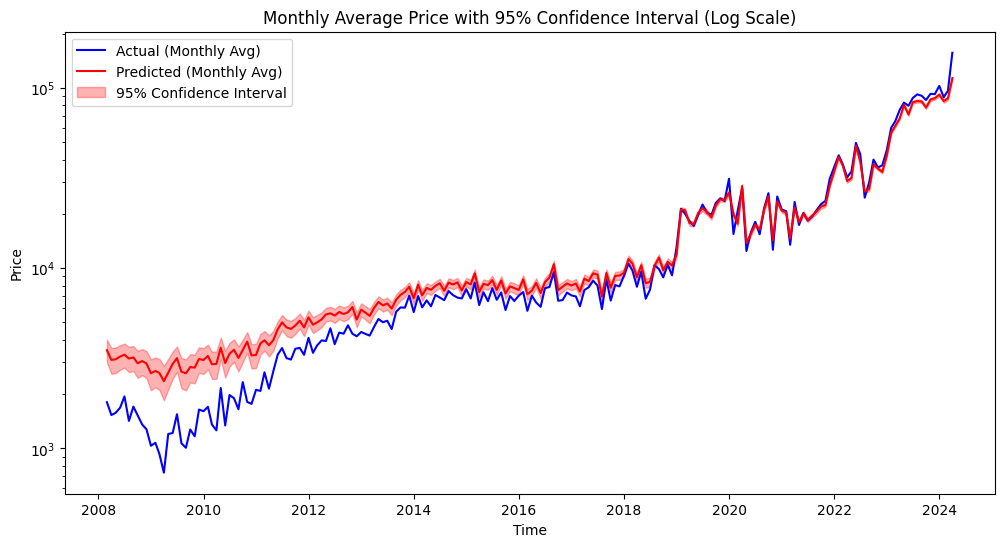

In [35]:
plt.figure(figsize=(12, 6))

# Get prediction summary frame (daily)
pred_summary = ols_model.get_prediction(X_sel).summary_frame(alpha=0.05)  # 95% CI

# Create pandas Series with same index as X_sel (which should align with y_clean)
pred_mean = pd.Series(pred_summary['mean'], index=X_sel.index)
ci_lower = pd.Series(pred_summary['mean_ci_lower'], index=X_sel.index)
ci_upper = pd.Series(pred_summary['mean_ci_upper'], index=X_sel.index)

# Resample to monthly frequency by taking mean (or sum if appropriate)
pred_monthly = pred_mean.resample('M').mean()
ci_lower_monthly = ci_lower.resample('M').mean()
ci_upper_monthly = ci_upper.resample('M').mean()
y_monthly = y_clean.resample('M').mean()

plt.plot(y_monthly.index, y_monthly, label='Actual (Monthly Avg)', color='blue')
plt.plot(pred_monthly.index, pred_monthly, label='Predicted (Monthly Avg)', color='red')
plt.fill_between(ci_lower_monthly.index, ci_lower_monthly, ci_upper_monthly,
                 color='red', alpha=0.3, label='95% Confidence Interval')

plt.xlabel('Time')
plt.ylabel('Price')
plt.yscale('log')  # Log scale on y-axis
plt.title('Monthly Average Price with 95% Confidence Interval (Log Scale)')
plt.legend()
plt.show()

In [36]:
# Create log change of price as dependent variable (1-period log return)
log_y_clean = np.log(y_clean / y_clean.shift(1))

# Drop all CP_lag columns from X_clean
cp_lag_cols = [col for col in X_clean.columns if col.startswith('CP_lag_')]
X_no_cp_lags = X_clean.drop(columns=cp_lag_cols)

# Create log lagged CP features for each lag present in CP_lag columns
for col in cp_lag_cols:
    lag_num = int(col.split('_')[-1])
    # Lagged log change features are lagged values of log_y_clean
    X_no_cp_lags[f'log_CP_lag_{lag_num}'] = log_y_clean.shift(lag_num)

# Combine features and target into one DataFrame to align indices
data = X_no_cp_lags.copy()
data['log_y'] = log_y_clean

# Drop all rows with any NaNs caused by lagging or target shift
data = data.dropna()
X_3 = data.drop(columns='log_y')
log_y_clean = data['log_y']

C:\Users\georg\AppData\Local\Temp\ipykernel_1392\2233364207.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_no_cp_lags[f'log_CP_lag_{lag_num}'] = log_y_clean.shift(lag_num)
C:\Users\georg\AppData\Local\Temp\ipykernel_1392\2233364207.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_no_cp_lags[f'log_CP_lag_{lag_num}'] = log_y_clean.shift(lag_num)
C:\Users\georg\AppData\Local\Temp\ipykernel_1392\2233364207.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_3)

In [38]:
# Time series CV
tscv = TimeSeriesSplit(n_splits=5)

# Fit LassoCV on weighted features
lasso_cv = LassoCV(cv=tscv, random_state=42, n_alphas=100, eps=1e-3)
lasso_cv.fit(X_3, log_y_clean)

# Scale back coefficients
coef = lasso_cv.coef_ / weights[:len(lasso_cv.coef_)]  # Adjust weights length if needed

# Identify non-zero features
selected = np.where(coef != 0)[0]
selected_features = X_3.columns[selected]
selected_coefs = coef[selected]

# Calculate RSS, AIC, BIC, R² for this model
y_pred = lasso_cv.predict(X_3) * weights.mean()  # approximate scaling
rss = np.sum((log_y_clean - y_pred) ** 2)
n = len(log_y_clean)
k = len(selected_features)

aic = n * np.log(rss / n) + 2 * k
bic = n * np.log(rss / n) + k * np.log(n)
r2 = lasso_cv.score(X_3, log_y_clean)

print(f'Selected features: {selected_features}')
print(f'AIC: {aic}, BIC: {bic}, R^2: {r2}')

# Fit OLS on selected features to get p-values
X_sel = sm.add_constant(X_3[selected_features])
ols_model = sm.OLS(log_y_clean, X_sel).fit()
print(ols_model.summary())

Selected features: Index(['doc2vec_4', 'doc2vec_5', 'doc2vec_8', 'doc2vec_12', 'doc2vec_20',
       'doc2vec_23', 'doc2vec_25', 'doc2vec_31', 'doc2vec_34', 'doc2vec_35',
       ...
       'log_CP_lag_1', 'log_CP_lag_2', 'log_CP_lag_3', 'log_CP_lag_4',
       'log_CP_lag_5', 'log_CP_lag_6', 'log_CP_lag_7', 'log_CP_lag_8',
       'log_CP_lag_9', 'log_CP_lag_10'],
      dtype='object', length=109)
AIC: 6734.416515795463, BIC: 7405.413576634454, R^2: 0.710570060128517
                            OLS Regression Results                            
Dep. Variable:                  log_y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     83.08
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:29:27   Log-Likelihood:                -1584.4
No. Observations:                3484   AIC:             

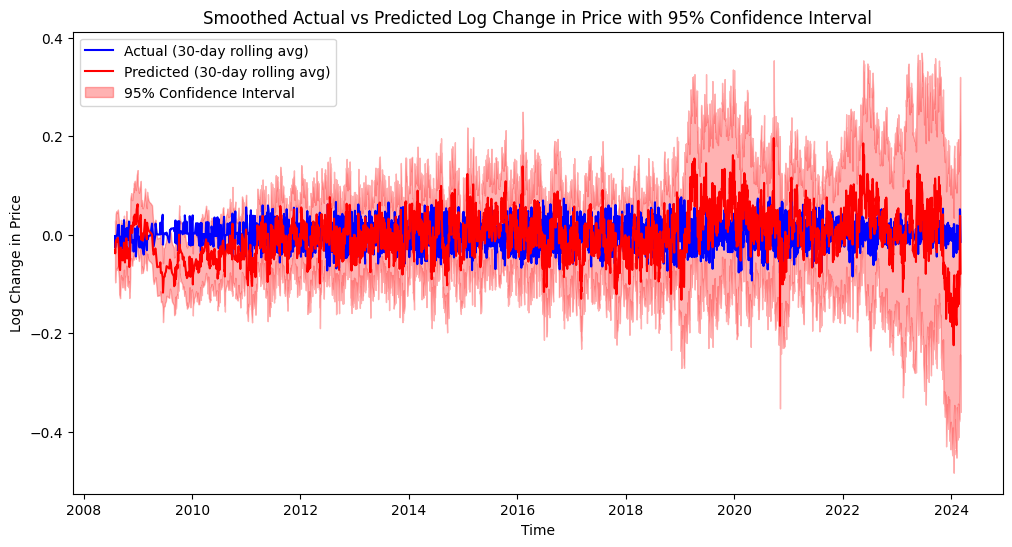

In [39]:
window = 30  # 30-day rolling window

# Predicted values and confidence intervals
predictions = ols_model.get_prediction(X_sel)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% CI

# Compute rolling averages
log_y_rolling = log_y_clean.rolling(window=window).mean()
pred_mean_rolling = pred_summary['mean'].rolling(window=window).mean()
ci_lower_rolling = pred_summary['mean_ci_lower'].rolling(window=window).mean()
ci_upper_rolling = pred_summary['mean_ci_upper'].rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(log_y_rolling.index, log_y_rolling, label='Actual (30-day rolling avg)', color='blue')
plt.plot(pred_mean_rolling.index, pred_mean_rolling, label='Predicted (30-day rolling avg)', color='red')
plt.fill_between(ci_lower_rolling.index, ci_lower_rolling, ci_upper_rolling,
                 color='red', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Log Change in Price')
plt.title('Smoothed Actual vs Predicted Log Change in Price with 95% Confidence Interval')
plt.legend()
plt.show()

In [41]:
# Parameters
n_alphas = 100
alphas = np.logspace(-4, 0, n_alphas)

# Time series CV
tscv = TimeSeriesSplit(n_splits=5)

# Store average BIC for each alpha
bic_scores = []

# Loop over alphas
for alpha in alphas:
    bic_fold_scores = []
    for train_index, test_index in tscv.split(X_3):
        X_train, X_test = X_3.iloc[train_index], X_3.iloc[test_index]
        y_train, y_test = log_y_clean.iloc[train_index], log_y_clean.iloc[test_index]

        model = Lasso(alpha=alpha, max_iter=10000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rss = np.sum((y_test - y_pred) ** 2)
        n = len(y_test)
        k = np.sum(model.coef_ != 0)

        if k == 0:
            # Penalize models with zero selected features heavily
            bic = np.inf
        else:
            bic = n * np.log(rss / n) + k * np.log(n)

        bic_fold_scores.append(bic)

    bic_scores.append(np.mean(bic_fold_scores))

# Select alpha with lowest average BIC
best_alpha = alphas[np.argmin(bic_scores)]

# Fit final model with best alpha
best_lasso = Lasso(alpha=best_alpha, max_iter=5000)
best_lasso.fit(X_3, log_y_clean)

# Scale back coefficients if weights available
coef = best_lasso.coef_ / weights[:len(best_lasso.coef_)]

# Identify non-zero features
selected = np.where(coef != 0)[0]
selected_features = X_3.columns[selected]
selected_coefs = coef[selected]

# Calculate RSS, AIC, BIC, R^2 on full data
y_pred_full = best_lasso.predict(X_3) * weights.mean()  # approximate scaling
rss_full = np.sum((log_y_clean - y_pred_full) ** 2)
n_full = len(log_y_clean)
k_full = len(selected_features)

aic_full = n_full * np.log(rss_full / n_full) + 2 * k_full
bic_full = n_full * np.log(rss_full / n_full) + k_full * np.log(n_full)
r2_full = best_lasso.score(X_3, log_y_clean)

print(f'Best alpha by BIC: {best_alpha}')
print(f'Selected features: {selected_features}')
print(f'AIC: {aic_full}, BIC: {bic_full}, R^2: {r2_full}')

# Fit OLS on selected features to get p-values
X_sel = sm.add_constant(X_3[selected_features])
ols_model = sm.OLS(log_y_clean, X_sel).fit()
print(ols_model.summary())

KeyboardInterrupt: 

In [ ]:
# Now calculate out-of-sample R^2 for best alpha
r2_scores = []
for train_index, test_index in tscv.split(X_3):
    X_train, X_test = X_3.iloc[train_index], X_3.iloc[test_index]
    y_train, y_test = log_y_clean.iloc[train_index], log_y_clean.iloc[test_index]

    model = Lasso(alpha=best_alpha, max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    ss_res = np.sum((y_test - y_pred) ** 2)
    ss_tot = np.sum((y_test - y_train.mean()) ** 2)
    r2 = 1 - ss_res / ss_tot
    r2_scores.append(r2)

out_of_sample_r2 = np.mean(r2_scores)
print(out_of_sample_r2)

In [ ]:
window = 30  # 30-day rolling window

# Predicted values and confidence intervals
predictions = ols_model.get_prediction(X_sel)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% CI

# Compute rolling averages
log_y_rolling = log_y_clean.rolling(window=window).mean()
pred_mean_rolling = pred_summary['mean'].rolling(window=window).mean()
ci_lower_rolling = pred_summary['mean_ci_lower'].rolling(window=window).mean()
ci_upper_rolling = pred_summary['mean_ci_upper'].rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(log_y_rolling.index, log_y_rolling, label='Actual (30-day rolling avg)', color='blue')
plt.plot(pred_mean_rolling.index, pred_mean_rolling, label='Predicted (30-day rolling avg)', color='red')
plt.fill_between(ci_lower_rolling.index, ci_lower_rolling, ci_upper_rolling,
                 color='red', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Log Change in Price')
plt.title('Smoothed Actual vs Predicted Log Change in Price with 95% Confidence Interval')
plt.legend()
plt.show()